In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline
import yfinance as yf

In [2]:
import datetime as dt

start=dt.datetime(2000,1,1)
end=dt.datetime(2025,6,30)
stock="POWERGRID.NS"
df=yf.download(stock, start ,end)

/tmp/ipython-input-2-365336511.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(stock, start ,end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545422,35.424689,26.900117,29.051480,855215656
2007-10-08,30.879332,33.645369,30.685223,33.645369,126671715
2007-10-09,32.982174,33.273335,29.229421,30.895512,116725709
2007-10-10,33.289497,33.968876,32.998337,33.839469,67931378
2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


In [4]:
df.shape

(4370, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4370 entries, 2007-10-05 to 2025-06-27
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4370 non-null   float64
 1   (High, POWERGRID.NS)    4370 non-null   float64
 2   (Low, POWERGRID.NS)     4370 non-null   float64
 3   (Open, POWERGRID.NS)    4370 non-null   float64
 4   (Volume, POWERGRID.NS)  4370 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 204.8 KB


In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4370.000000,4370.000000,4370.000000,4370.000000,4.370000e+03
mean,87.515757,88.649753,86.396757,87.552973,1.195204e+07
std,74.711176,75.600815,73.788256,74.697188,2.027393e+07
min,19.001734,20.312198,17.036038,20.213913,0.000000e+00
25%,36.814370,37.334225,36.275191,36.876142,4.905826e+06
50%,66.064655,67.084085,65.028507,66.121289,8.543705e+06
75%,90.905121,91.506535,87.881129,89.792191,1.382501e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [7]:
df.columns

MultiIndex([( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [8]:
df=df.reset_index()
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [9]:
df.to_csv('powergrid.csv')
df.shape

(4370, 6)

In [10]:
data01=pd.read_csv("powergrid.csv")

In [11]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.5454216003418,35.4246891776911,26.90011689528922,29.051480080819935,855215656
2,1,2007-10-08,30.879331588745117,33.645368840548784,30.685222864632642,33.645368840548784,126671715
3,2,2007-10-09,32.982173919677734,33.273334876563496,29.229420508905978,30.89551235079529,116725709
4,3,2007-10-10,33.28949737548828,33.96887558934333,32.9983365375293,33.83946906605695,67931378


In [12]:
# complete visulaization using Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [13]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.545422,35.424689,26.900117,29.051480,855215656
1,2007-10-08,30.879332,33.645369,30.685223,33.645369,126671715
2,2007-10-09,32.982174,33.273335,29.229421,30.895512,116725709
3,2007-10-10,33.289497,33.968876,32.998337,33.839469,67931378
4,2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


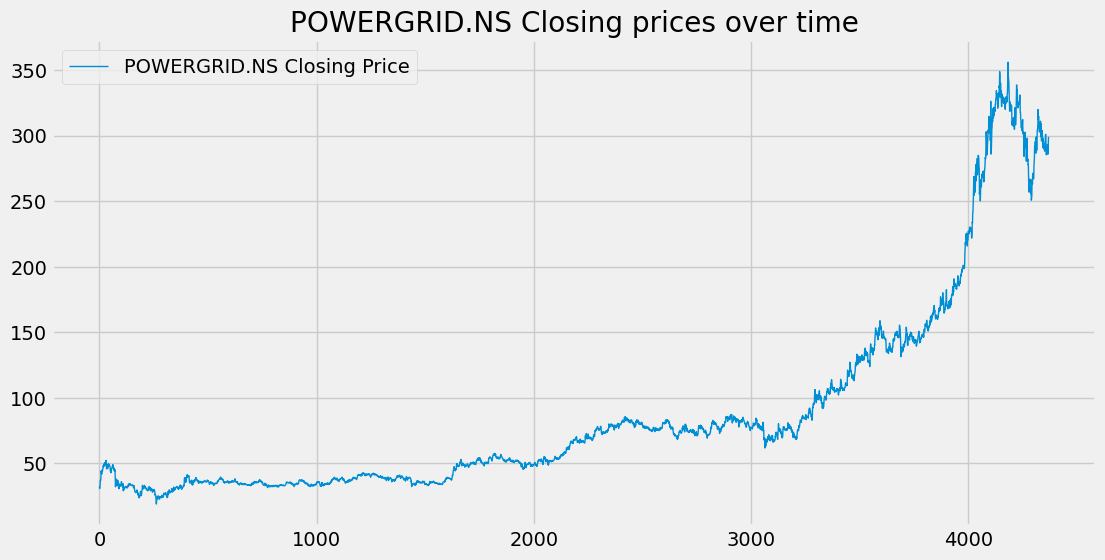

In [14]:

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

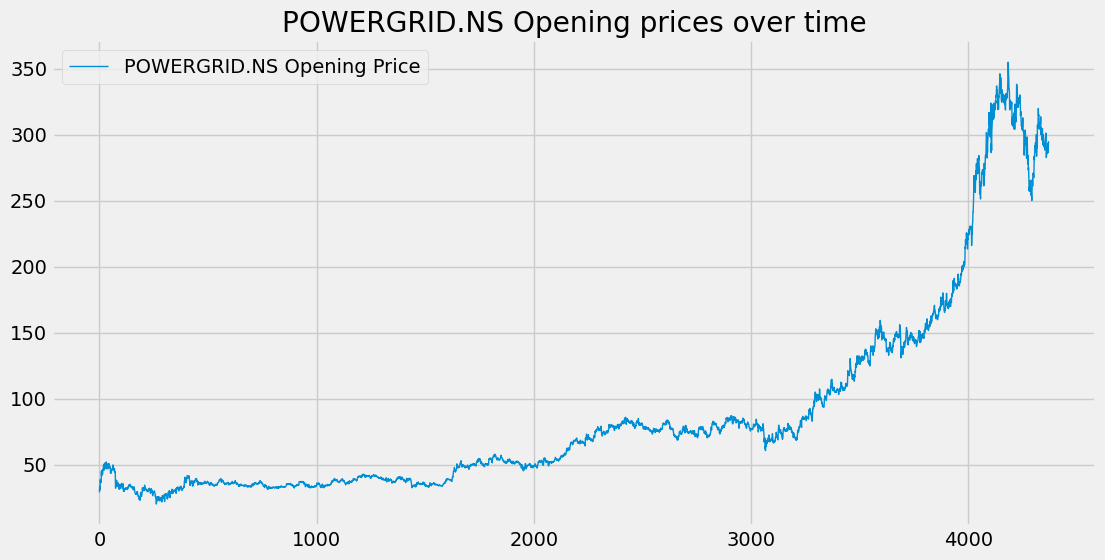

In [15]:

plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

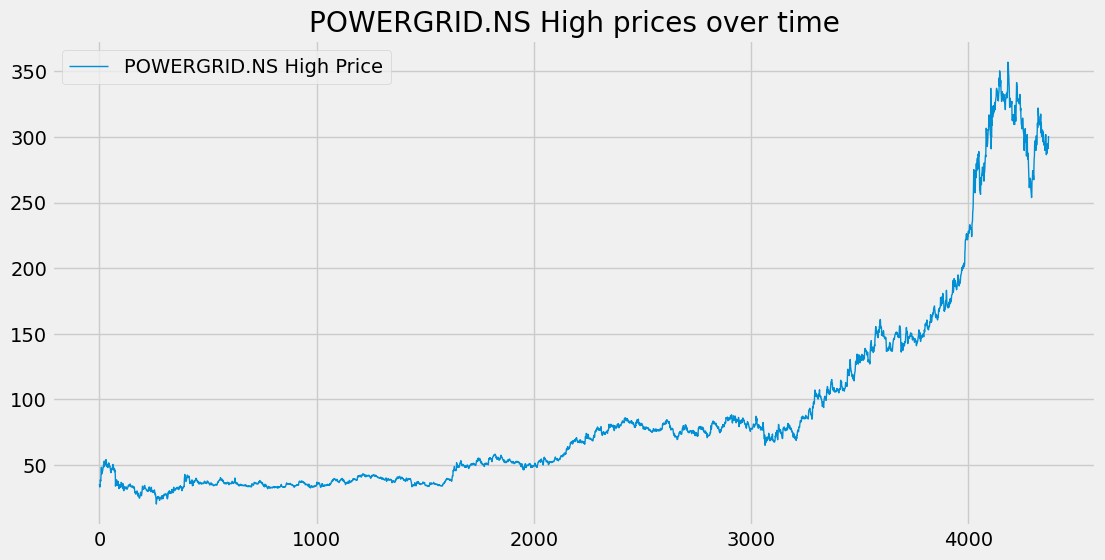

In [16]:

plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

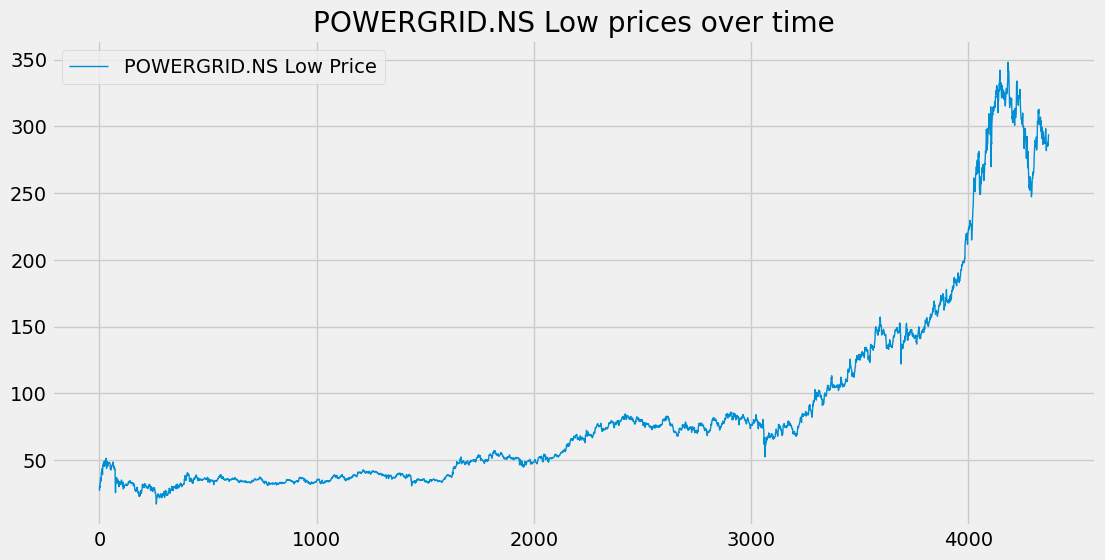

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Low'], label = f'{stock} Low Price', linewidth = 1)
plt.title(f'{stock} Low prices over time')
plt.legend()
plt.show()

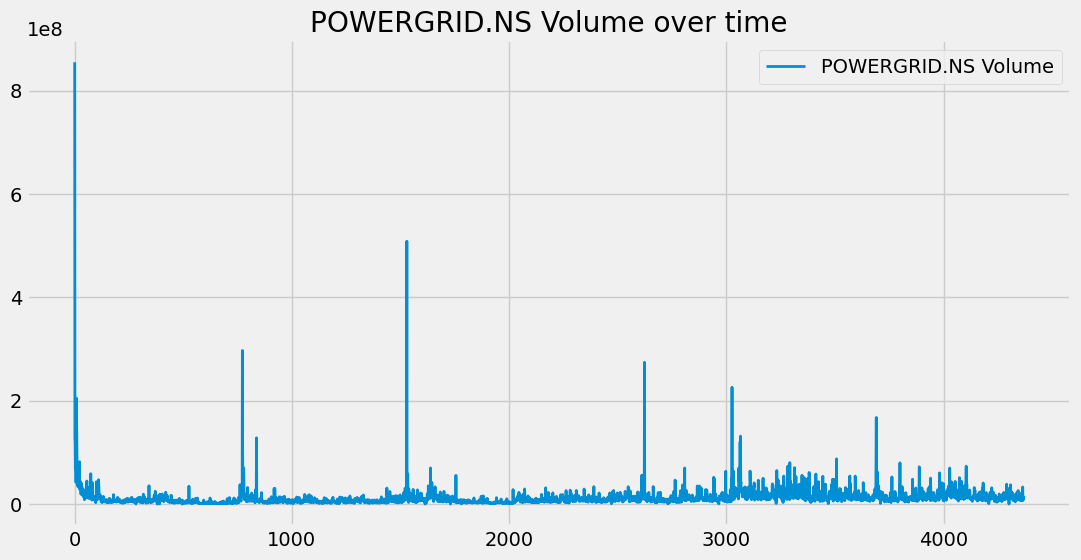

In [18]:

plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [19]:
#there are 2 technique in stock prediction analysis , first one is moving avg and other one is exp moving avg
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
import pandas as pd
df01 = pd.DataFrame(temp_data)
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [20]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4365,286.923413
4366,286.946090
4367,287.043914
4368,287.133688


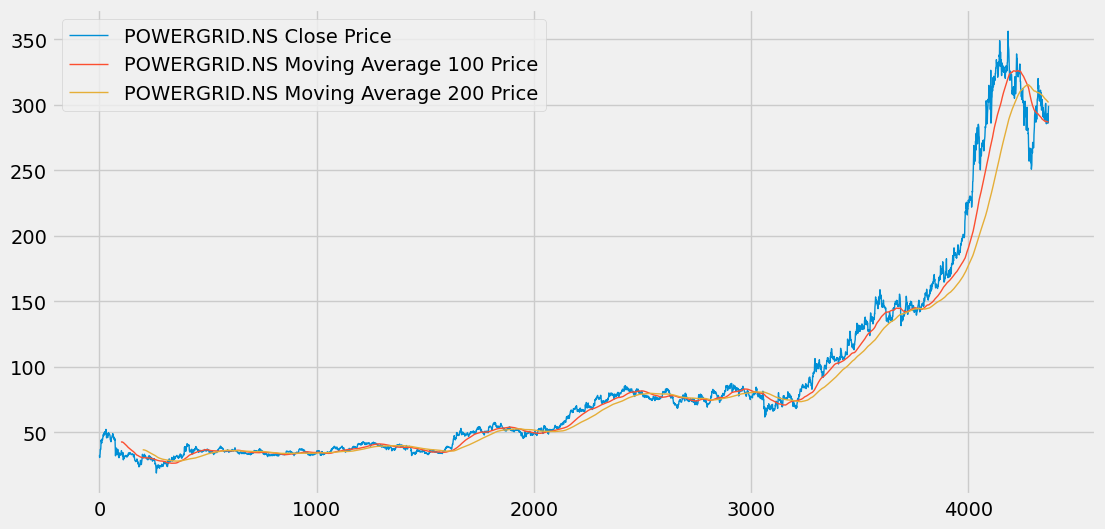

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [22]:
#why NOT RNN because of vanishing gradient problem
#training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(3059, 1)
(1311, 1)


In [23]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

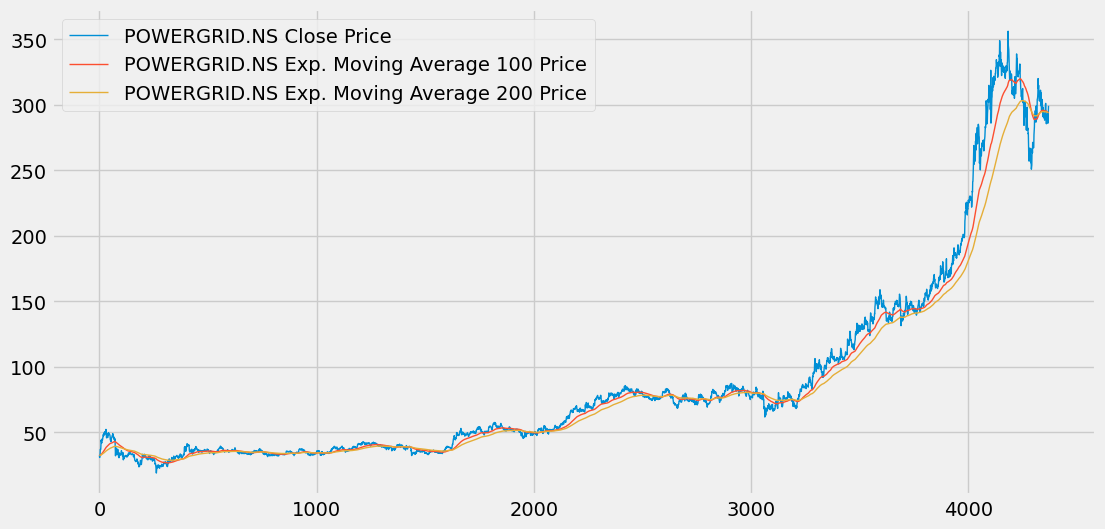

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [25]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [26]:
from sklearn.preprocessing import MinMaxScaler
# it is continuous value thats why we have to set in a range
scaler = MinMaxScaler(feature_range = (0, 1))

In [27]:
data_training

Ticker,POWERGRID.NS
0,32.545422
1,30.879332
2,32.982174
3,33.289497
4,37.009907
...,...
3054,81.417923
3055,80.963409
3056,78.752892
3057,74.765663


In [28]:

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.19808599],
       [0.17371825],
       [0.2044738 ],
       ...,
       [0.87390283],
       [0.81558681],
       [0.81830614]])

In [29]:
data_training_array.shape

(3059, 1)

In [30]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [31]:
x_train.shape

(2959, 100, 1)

In [32]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
# LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
# LSTM 2D OR 3D
# 2D -> (batch_sizem units)
# 3D -> (batch_size, time_steps, units)

In [34]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - loss: 0.0856
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0094
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0078
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0069
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0068
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0069
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0069
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0053
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0055
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0051
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0047
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0052
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0047
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0047
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0039
Epo

In [40]:
#first 100 values are NaN beacause we are applying moving average, prepare data for 100 days
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [43]:
#first 100 days data are appended in testing data
final_df.head()

Ticker,POWERGRID.NS
0,81.686501
1,83.690445
2,84.723412
3,85.219238
4,84.330887


In [44]:
input_data=scaler.fit_transform(final_df)

In [45]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [46]:
x_test.shape

(1311, 100, 1)

In [47]:
y_predicted = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step


In [48]:
y_predicted.shape

(1311, 1)

In [49]:
scaler.scale_

array([0.00339719])

In [53]:
scaler_factor = 1 / 0.007279
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

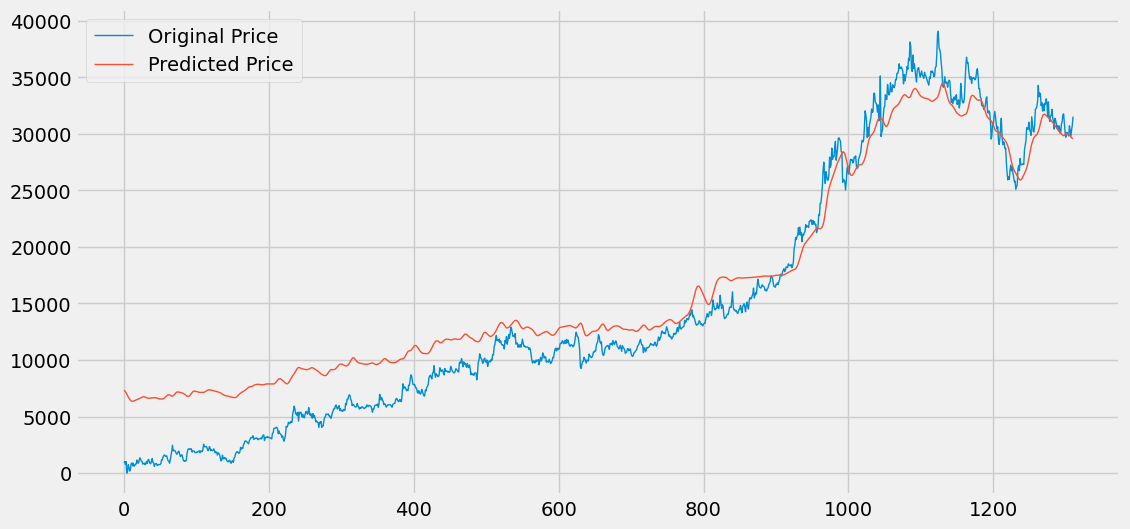

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [52]:
model.save('stock_dl_model.h5')